In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import os
import graphviz

os.environ['PATH'] = os.environ['PATH'] + ';C:/Program Files (x86)/Graphviz2.38/bin'


pandas.set_option("display.precision", 2)


# Load Data 

In [2]:
data_cols = ['Salario','Localizacao','Funcao','Aceite']
data_values = [
    ['alto','longe','analista','sim'],
    ['baixo','perto','analista','nao'],
    ['baixo','longe','analista','sim'],
    ['alto','longe','executivo','nao'],
    ['alto','perto','analista','sim'],
    ['baixo','longe','executivo','nao'],
]

data = pandas.DataFrame(data_values, columns=data_cols)

data

,Salario,Localizacao,Funcao,Aceite
0,alto,longe,analista,sim
1,baixo,perto,analista,nao
2,baixo,longe,analista,sim
3,alto,longe,executivo,nao
4,alto,perto,analista,sim
5,baixo,longe,executivo,nao


In [3]:

encoder = preprocessing.OrdinalEncoder()
num_data = pandas.DataFrame(encoder.fit_transform(data), columns=data.columns)
 


clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(num_data[['Salario','Localizacao','Funcao']], num_data['Aceite'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

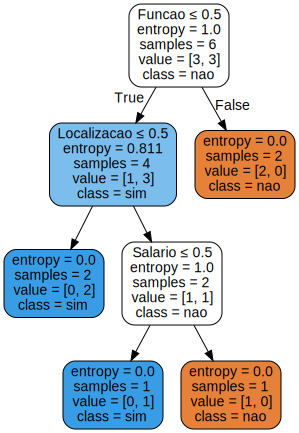

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['Salario','Localizacao','Funcao'],  
                      class_names=encoder.categories_[-1],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 